In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

In [3]:
#Load images from UTK-Face dataset

path = "/Users/ninahorstmann/Downloads/UTKFace/"
files = os.listdir(path)
size = len(files)
print("Total samples:",size)

images = []
ages = []
race = []
for file in files:
    image = cv2.imread(path+file,3)
    image = image.reshape((image.shape[0],image.shape[1],3))
    image = cv2.resize(image,dsize=(32,32))
    b,g,r = cv2.split(image)           # get b, g, r
    rgbimage = cv2.merge([r,g,b])      # switch it to r, g, b
    images.append(rgbimage)
    split_var = file.split('_')
    ages.append(split_var[0])
    race.append(split_var[2])

Total samples: 23708


In [4]:
#Isolate images labeled as 'white'
white_idx = np.where(np.array(race)=='0')[0]
white_images = [images[i] for i in white_idx]
white_ages = [ages[i] for i in white_idx]
white_ages_int = [int(i) for i in white_ages]

#Isolate images labeled as 'black'
black_idx = np.where(np.array(race)=='1')[0]
black_images = [images[i] for i in black_idx]
black_ages = [ages[i] for i in black_idx]
black_ages_int = [int(i) for i in black_ages]

#Isolate images labeled as 'asian'
asian_idx = np.where(np.array(race)=='2')[0]
asian_images = [images[i] for i in asian_idx]
asian_ages = [ages[i] for i in asian_idx]
asian_ages_int = [int(i) for i in asian_ages]

#Isolate images labeled as 'indian'
indian_idx = np.where(np.array(race)=='3')[0]
indian_images = [images[i] for i in indian_idx]
indian_ages = [ages[i] for i in indian_idx]
indian_ages_int = [int(i) for i in indian_ages]

#Extract indices from previous random sampling
from numpy import genfromtxt
sample_idx = genfromtxt('sample_idx.csv', delimiter=',')
white_sample_idx = sample_idx[:,0]
black_sample_idx = sample_idx[:,1].astype(int)
asian_sample_idx = sample_idx[:,2].astype(int)
indian_sample_idx = sample_idx[:,3].astype(int)

#Subdivide the dataset
white_sample_images = [white_images[int(i)] for i in white_sample_idx]
white_sample_ages = [white_ages[int(i)] for i in white_sample_idx]

black_sample_images = [black_images[int(i)] for i in black_sample_idx]
black_sample_ages = [black_ages[int(i)] for i in black_sample_idx]

asian_sample_images = [asian_images[int(i)] for i in asian_sample_idx]
asian_sample_ages = [asian_ages[int(i)] for i in asian_sample_idx]

indian_sample_images = [indian_images[int(i)] for i in indian_sample_idx]
indian_sample_ages = [indian_ages[int(i)] for i in indian_sample_idx]

all_sample_ages = np.concatenate((white_sample_ages,black_sample_ages,asian_sample_ages,indian_sample_ages))
all_sample_ages = [int(i) for i in all_sample_ages]
all_sample_images = np.concatenate((white_sample_images,black_sample_images,asian_sample_images,indian_sample_images))

In [5]:
#Extract Amazon Rekog predicted ages from saved dataset
rekog_ages = genfromtxt('rekog_ages.csv', delimiter=',')
rekog_white_ages = rekog_ages[:,0]
rekog_black_ages = rekog_ages[:,1]
rekog_asian_ages = rekog_ages[:,2]
rekog_indian_ages = rekog_ages[:,3]

rekog_ages=np.concatenate((rekog_white_ages,rekog_black_ages,rekog_asian_ages,rekog_indian_ages)).astype(int)
rekog_diff = np.abs(rekog_ages-all_sample_ages)


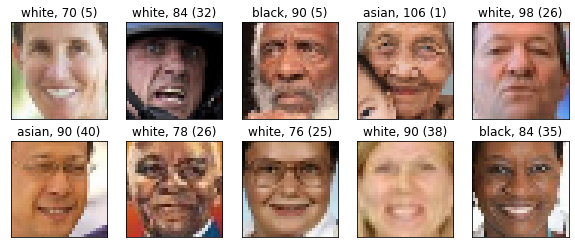

In [11]:
#Plot 10 worst predictions
worst10 = np.flip(np.argpartition(rekog_diff, -10)[-10:])
fig=plt.figure(figsize=(10, 4))
labels=['white']*2000+['black']*2000+['asian']*2000+['indian']*2000
for i, index in enumerate(worst10):
    img = all_sample_images[index]
    ax=fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
    plt.imshow(img)
    # Set the title for each image
    ax.set_title("{}, {} ({})".format(labels[index],
                                      rekog_ages[index], 
                                      all_sample_ages[index]))

plt.show()
fig.savefig('rekogworst10.png')

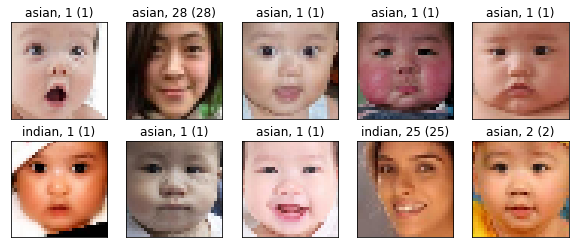

In [12]:
#Plot 10 best predictions
top10 = top10 = np.argsort(rekog_diff)[0:10]
fig=plt.figure(figsize=(10, 4))
labels=['white']*2000+['black']*2000+['asian']*2000+['indian']*2000
for i, index in enumerate(top10):
    img = all_sample_images[index]
    ax=fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
    plt.imshow(img)
    # Set the title for each image
    ax.set_title("{}, {} ({})".format(labels[index],
                                      rekog_ages[index], 
                                      all_sample_ages[index]))

plt.show()
fig.savefig('rekogbest10.png')

In [6]:
#Extract FacePP predicted ages from saved dataset
facepp_ages = genfromtxt('facepp_ages.csv', delimiter=',')
facepp_white_ages = facepp_ages[:,0]
facepp_black_ages = facepp_ages[:,1]
facepp_asian_ages = facepp_ages[:,2]
facepp_indian_ages = facepp_ages[:,3]

facepp_ages=np.concatenate((facepp_white_ages,facepp_black_ages,facepp_asian_ages,facepp_indian_ages)).astype(int)
facepp_diff = np.abs(facepp_ages-all_sample_ages)

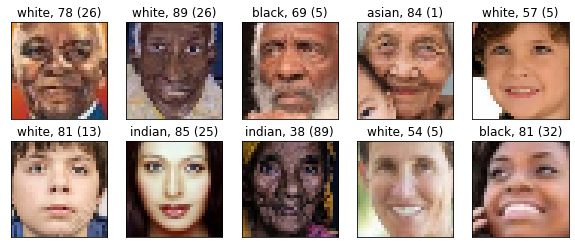

In [13]:
#Plot 10 worst predictions
worst10 = np.flip(np.argpartition(facepp_diff, -10)[-10:])
fig=plt.figure(figsize=(10, 4))
labels=['white']*2000+['black']*2000+['asian']*2000+['indian']*2000
for i, index in enumerate(worst10):
    img = all_sample_images[index]
    ax=fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
    plt.imshow(img)
    # Set the title for each image
    ax.set_title("{}, {} ({})".format(labels[index],
                                      facepp_ages[index], 
                                      all_sample_ages[index]))

plt.show()
fig.savefig('faceppworst10.png')

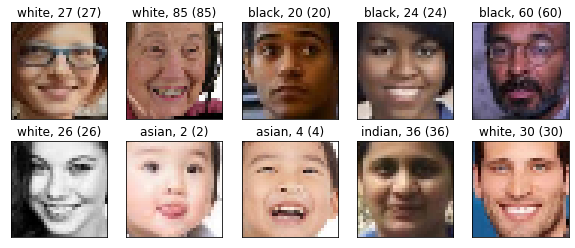

In [139]:
#Plot 10 best predictions
top10 = np.argsort(facepp_diff)[0:10]
fig=plt.figure(figsize=(10, 4))
labels=['white']*2000+['black']*2000+['asian']*2000+['indian']*2000
for i, index in enumerate(top10):
    img = all_sample_images[index]
    ax=fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
    plt.imshow(img)
    # Set the title for each image
    ax.set_title("{}, {} ({})".format(labels[index],
                                      facepp_ages[index], 
                                      all_sample_ages[index]))

plt.show()
fig.savefig('faceppbest10.png')

In [7]:
#Extract DeepFace predicted ages from saved dataset
df_ages = genfromtxt('df_ages.csv', delimiter=',')
df_white_ages = df_ages[:,0]
df_black_ages = df_ages[:,1]
df_asian_ages = df_ages[:,2]
df_indian_ages = df_ages[:,3]
df_ages=np.concatenate((df_white_ages,df_black_ages,df_asian_ages,df_indian_ages)).astype(int)
df_diff = np.abs(df_ages-all_sample_ages)

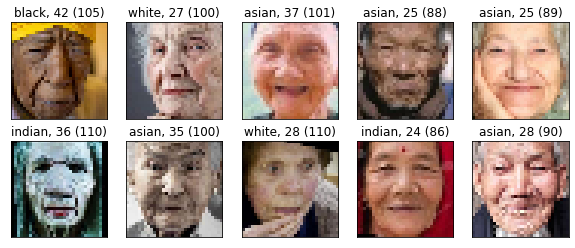

In [133]:
#Plot 10 worst predictions
worst10 = np.flip(np.argpartition(df_diff, -10)[-10:])
fig=plt.figure(figsize=(10, 4))
labels=['white']*2000+['black']*2000+['asian']*2000+['indian']*2000
for i, index in enumerate(worst10):
    img = all_sample_images[index]
    ax=fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
    plt.imshow(img)
    # Set the title for each image
    ax.set_title("{}, {} ({})".format(labels[index],
                                      df_ages[index], 
                                      all_sample_ages[index]))

plt.show()
fig.savefig('dfworst10.png')

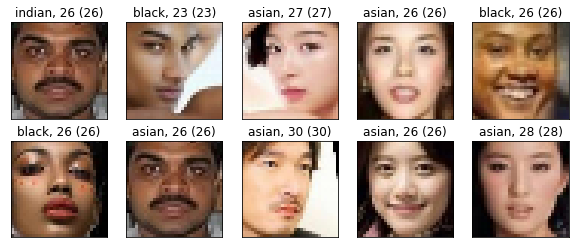

In [135]:
#Plot 10 best predictions
top10 = np.argsort(df_diff)[0:10]
fig=plt.figure(figsize=(10, 4))
labels=['white']*2000+['black']*2000+['asian']*2000+['indian']*2000
for i, index in enumerate(top10):
    img = all_sample_images[index]
    ax=fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
    plt.imshow(img)
    # Set the title for each image
    ax.set_title("{}, {} ({})".format(labels[index],
                                      df_ages[index], 
                                      all_sample_ages[index]))

plt.show()
fig.savefig('dfbest10.png')

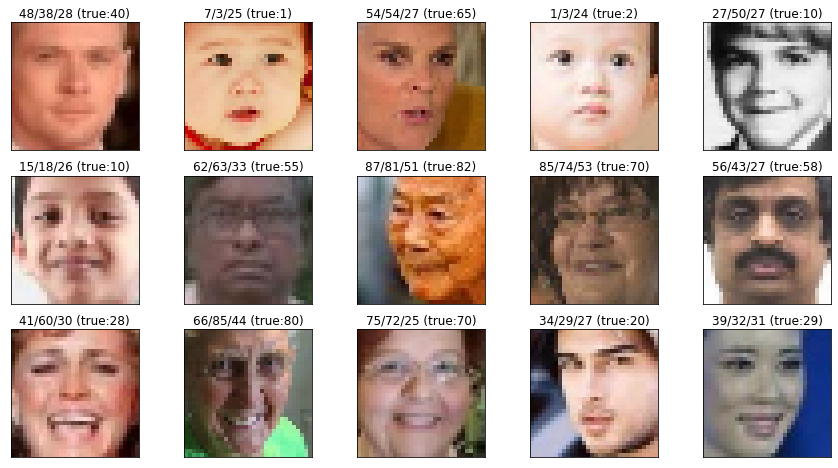

In [10]:
# Plot a random sample of 15 test images, their predicted labels from all models and the ground truth
import random
figure = plt.figure(figsize=(15, 8))
for i, index in enumerate(random.choices(range(8000),k=15)):
    img = all_sample_images[index]
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    plt.imshow(img, vmin=0, vmax=255)
    ax.set_title("{}/{}/{} (true:{})".format(int(rekog_ages[index]),
                                      int(facepp_ages[index]),
                                      int(df_ages[index]), 
                                      int(all_sample_ages[index])))
plt.show()
figure.savefig('randomarray.png')